In [1]:
import boto3
import botocore
from iterdub import iterdub as ib
import matplotlib.pyplot as plt
import pandas as pd
from pandas.util import hash_pandas_object
from scipy import stats
import seaborn as sns
from teeplot import teeplot as tp


In [2]:
from dishpylib.pyhelpers import make_outattr_metadata
from dishpylib.pyhelpers import print_runtime


In [3]:
print_runtime()


context: ci
hostname: runnervm6whdl
interpreter: 3.10.12 (main, Aug 15 2025, 14:32:43) [GCC 11.4.0]
notebook name: bucket=prq49--a=all_stints_all_series_profiles+endeavor=16--fitness_complexity
notebook path: /home/runner/work/oee4/oee4/binder/bucket=prq49--a=all_stints_all_series_profiles+endeavor=16--fitness_complexity.ipynb
revision: bdac574
timestamp: 2025-09-03T03:23:18Z00:00

IPython==7.16.1
packaging==25.0


<ipython-input-3-4d790cf6450f>:1: DeprecatedWarning: print_runtime is deprecated. use nbmetalog package instead
  print_runtime()


# get data


In [4]:
s3_handle = boto3.resource(
    's3',
    region_name="us-east-2",
    config=botocore.config.Config(
        signature_version=botocore.UNSIGNED,
    ),
)
bucket_handle = s3_handle.Bucket('prq49')

series_profiles, = bucket_handle.objects.filter(
    Prefix=f'endeavor=16/series-profiles/stage=8+what=elaborated/',
)


In [5]:
df = pd.read_csv(
    f's3://prq49/{series_profiles.key}',
    compression='xz',
)
dfdigest = '{:x}'.format( hash_pandas_object( df ).sum() )
dfdigest


<ipython-input-5-747b1fe91af5>:1: DtypeWarning: Columns (2270,2277,2284,2285,2286,2287,2289,2290,2291,2292,2298,2299,2300,2301,2302,2308,2309,2310) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(


'-1af9f0eb89153a8e'

In [6]:
for stint in df['Stint'].unique():
    exec(f'df{stint} = df[ df["Stint"] == {stint} ]')


In [7]:
dfm10 = df[ df['Stint'] % 10 == 0 ]


# how does fitness complexity change over time?


<ipython-input-8-6330eab88396>:15: DeprecatedWarning: make_outattr_metadata is deprecated. use nbmetalog package instead
  **make_outattr_metadata(),


teeplots/bucket=prq49+endeavor=16+hue=series+transform=filter-Stint-mod10+viz=lineplot+x=stint+y=fitness-complexity+ext=.pdf
teeplots/bucket=prq49+endeavor=16+hue=series+transform=filter-Stint-mod10+viz=lineplot+x=stint+y=fitness-complexity+ext=.png


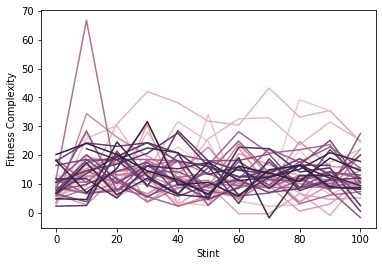

<AxesSubplot:xlabel='Stint', ylabel='Fitness Complexity'>

In [8]:
tp.tee(
    sns.lineplot,
    data=dfm10,
    x='Stint',
    y='Fitness Complexity',
    hue='Series',
    legend=False,
    teeplot_outattrs={
        **{
            'bucket' : ib.dub( df['Bucket'] ),
            'endeavor' : ib.dub( df['Endeavor'].astype(int) ),
            'transform' : 'filter-Stint-mod10',
            '_dfdigest' : dfdigest,
        },
        **make_outattr_metadata(),
    },
)


<ipython-input-9-561710cdc2ad>:31: DeprecatedWarning: make_outattr_metadata is deprecated. use nbmetalog package instead
  **make_outattr_metadata(),


teeplots/bucket=prq49+endeavor=16+transform=filter-Stint-mod10+viz=hline-swarmplot-boxplot+x=stint+y=fitness-complexity-delta+ext=.pdf
teeplots/bucket=prq49+endeavor=16+transform=filter-Stint-mod10+viz=hline-swarmplot-boxplot+x=stint+y=fitness-complexity-delta+ext=.png


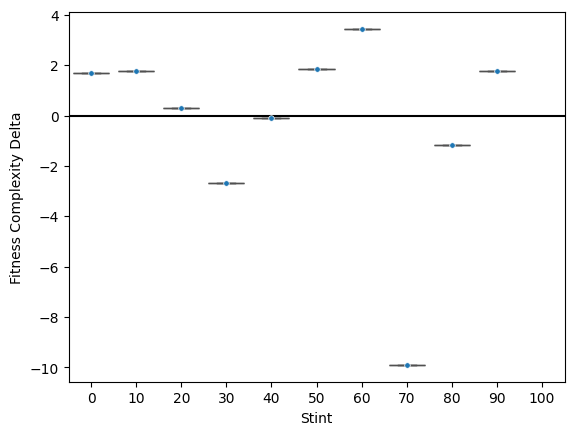

In [9]:
def hline_swarmplot_boxplot(*args, **kwargs):
    plt.axhline(
        0,
        c='k',
        zorder=-1,
    )
    sns.swarmplot(
        *args,
        **kwargs,
        edgecolor='w',
        linewidth=0.5,
        s=4,
    )
    sns.boxplot(
        *args,
        **kwargs,
    )

tp.tee(
    hline_swarmplot_boxplot,
    data=dfm10,
    x='Stint',
    y='Fitness Complexity Delta',
    teeplot_outattrs={
        **{
            'bucket' : ib.dub( df['Bucket'] ),
            'endeavor' : ib.dub( df['Endeavor'].astype(int) ),
            'transform' : 'filter-Stint-mod10',
            '_dfdigest' : dfdigest,
        },
        **make_outattr_metadata(),
    },
)


<ipython-input-10-6e96ee6ff450>:24: DeprecatedWarning: make_outattr_metadata is deprecated. use nbmetalog package instead
  **make_outattr_metadata(),


teeplots/bucket=prq49+endeavor=16+transform=filter-Stint-mod10+viz=hline-barplot+x=stint+y=fitness-complexity-delta+ext=.pdf
teeplots/bucket=prq49+endeavor=16+transform=filter-Stint-mod10+viz=hline-barplot+x=stint+y=fitness-complexity-delta+ext=.png


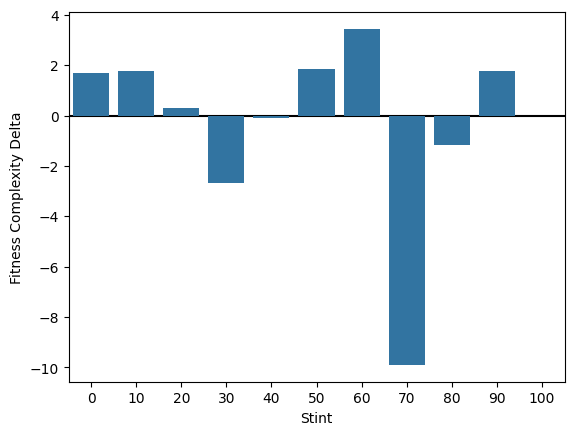

In [10]:
def hline_barplot(*args, **kwargs):
    plt.axhline(
        0,
        c='k',
        zorder=-1,
    )
    sns.barplot(
        *args,
        **kwargs,
    )

tp.tee(
    hline_barplot,
    data=dfm10,
    x='Stint',
    y='Fitness Complexity Delta',
    teeplot_outattrs={
        **{
            'bucket' : ib.dub( df['Bucket'] ),
            'endeavor' : ib.dub( df['Endeavor'].astype(int) ),
            'transform' : 'filter-Stint-mod10',
            '_dfdigest' : dfdigest,
        },
        **make_outattr_metadata(),
    },
)


<ipython-input-11-f2ac244cad1b>:26: DeprecatedWarning: make_outattr_metadata is deprecated. use nbmetalog package instead
  **make_outattr_metadata(),
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3399: UserWarning: 10.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3399: UserWarning: 15.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3399: UserWarning: 10.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


teeplots/bucket=prq49+endeavor=16+transform=identity+viz=swarmplot-boxplot+x=stint+y=fitness-complexity+ext=.pdf


/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3399: UserWarning: 10.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3399: UserWarning: 15.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3399: UserWarning: 10.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


teeplots/bucket=prq49+endeavor=16+transform=identity+viz=swarmplot-boxplot+x=stint+y=fitness-complexity+ext=.png


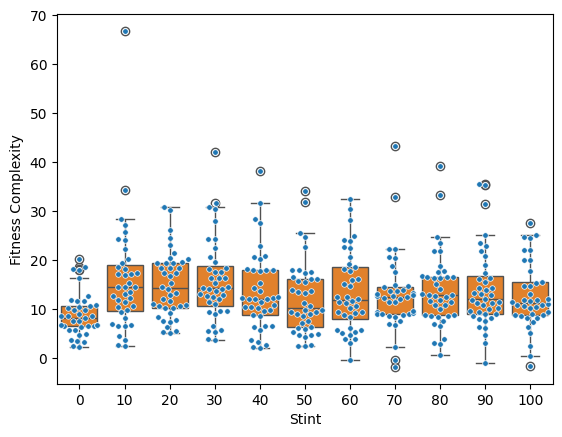

In [11]:
def swarmplot_boxplot(*args, **kwargs):
    sns.swarmplot(
        *args,
        **kwargs,
        edgecolor='w',
        linewidth=0.5,
        s=4,
    )
    sns.boxplot(
        *args,
        **kwargs,
    )

tp.tee(
    swarmplot_boxplot,
    data=dfm10,
    x='Stint',
    y='Fitness Complexity',
    teeplot_outattrs={
        **{
            'bucket' : ib.dub( df['Bucket'] ),
            'endeavor' : ib.dub( df['Endeavor'].astype(int) ),
            'transform' : 'identity',
            '_dfdigest' : dfdigest,
        },
        **make_outattr_metadata(),
    },
)


<ipython-input-12-670ec94fd6d8>:15: DeprecatedWarning: make_outattr_metadata is deprecated. use nbmetalog package instead
  **make_outattr_metadata(),
/usr/local/lib/python3.10/dist-packages/numpy/lib/nanfunctions.py:1395: RuntimeWarning: All-NaN slice encountered
  result = np.apply_along_axis(_nanquantile_1d, axis, a, q,


teeplots/bucket=prq49+endeavor=16+transform=filter-Stint-40+viz=lmplot+x=fitness-complexity+y=fitness-complexity-delta-sign+ext=.pdf
teeplots/bucket=prq49+endeavor=16+transform=filter-Stint-40+viz=lmplot+x=fitness-complexity+y=fitness-complexity-delta-sign+ext=.png


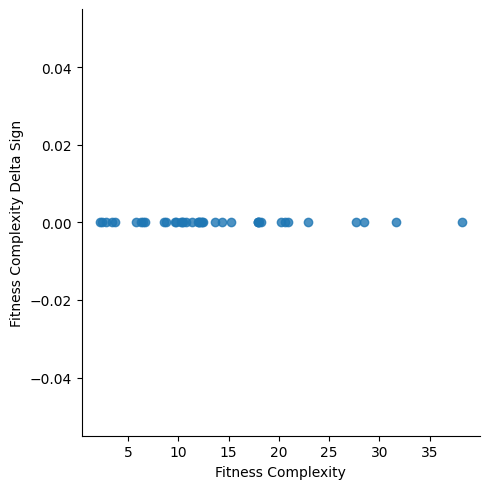

In [12]:
tp.tee(
    sns.lmplot,
    data=df40,
    x='Fitness Complexity',
    y='Fitness Complexity Delta Sign',
    logistic=True,
    truncate=False,
    teeplot_outattrs={
        **{
            'bucket' : ib.dub( df['Bucket'] ),
            'endeavor' : ib.dub( df['Endeavor'].astype(int) ),
            'transform' : 'filter-Stint-40',
            '_dfdigest' : dfdigest,
        },
        **make_outattr_metadata(),
    },
)


<ipython-input-13-f6da4b1fe654>:24: DeprecatedWarning: make_outattr_metadata is deprecated. use nbmetalog package instead
  **make_outattr_metadata(),


teeplots/bucket=prq49+endeavor=16+transform=filter-Stint-40+viz=identityline-regplot+x=fitness-complexity+y=fitness-complexity-delta+ext=.pdf
teeplots/bucket=prq49+endeavor=16+transform=filter-Stint-40+viz=identityline-regplot+x=fitness-complexity+y=fitness-complexity-delta+ext=.png


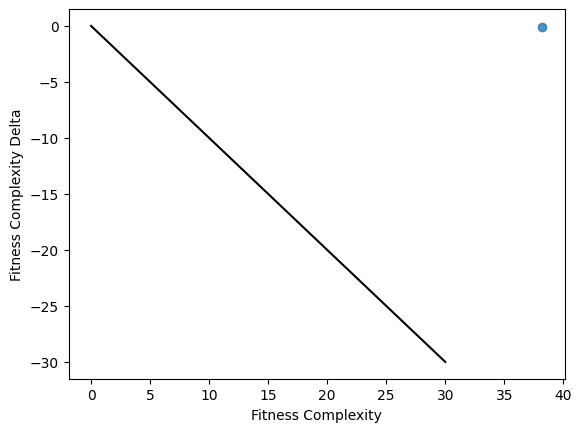

In [13]:
def identityline_regplot(*args, **kwargs):
    sns.regplot(
        *args,
        **kwargs,
    )
    plt.plot(
        [0,30],
        [0,-30],
        c='k',
    )

tp.tee(
    identityline_regplot,
    data=df40,
    x='Fitness Complexity',
    y='Fitness Complexity Delta',
    teeplot_outattrs={
        **{
            'bucket' : ib.dub( df['Bucket'] ),
            'endeavor' : ib.dub( df['Endeavor'].astype(int) ),
            'transform' : 'filter-Stint-40',
            '_dfdigest' : dfdigest,
        },
        **make_outattr_metadata(),
    },
)


# case study: series 16005


<ipython-input-14-ae97c1d9f55d>:15: DeprecatedWarning: make_outattr_metadata is deprecated. use nbmetalog package instead
  **make_outattr_metadata(),


teeplots/bucket=prq49+endeavor=16+hue=series+transform=filter-Series-16005~filter-Stint-mod10+viz=lineplot+x=stint+y=fitness-complexity+ext=.pdf
teeplots/bucket=prq49+endeavor=16+hue=series+transform=filter-Series-16005~filter-Stint-mod10+viz=lineplot+x=stint+y=fitness-complexity+ext=.png


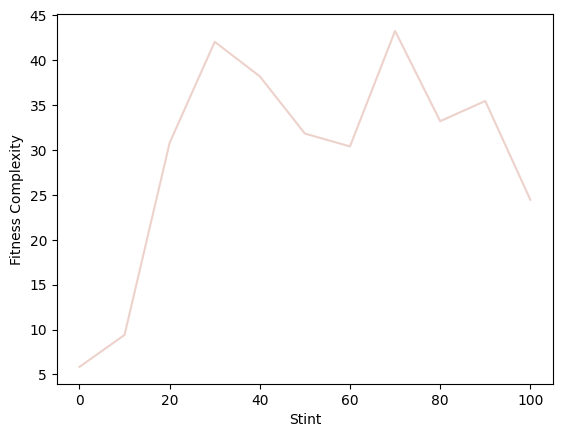

<AxesSubplot:xlabel='Stint', ylabel='Fitness Complexity'>

In [14]:
tp.tee(
    sns.lineplot,
    data=dfm10[ dfm10['Series'] == 16005 ],
    x='Stint',
    y='Fitness Complexity',
    hue='Series',
    legend=False,
    teeplot_outattrs={
        **{
            'bucket' : ib.dub( df['Bucket'] ),
            'endeavor' : ib.dub( df['Endeavor'].astype(int) ),
            'transform' : 'filter-Series-16005~filter-Stint-mod10',
            '_dfdigest' : dfdigest,
        },
        **make_outattr_metadata(),
    },
)


# case study: series 16021


<ipython-input-15-4659a7b58995>:15: DeprecatedWarning: make_outattr_metadata is deprecated. use nbmetalog package instead
  **make_outattr_metadata(),


teeplots/bucket=prq49+endeavor=16+hue=series+transform=filter-Series-16021~filter-Stint-mod10+viz=lineplot+x=stint+y=fitness-complexity+ext=.pdf
teeplots/bucket=prq49+endeavor=16+hue=series+transform=filter-Series-16021~filter-Stint-mod10+viz=lineplot+x=stint+y=fitness-complexity+ext=.png


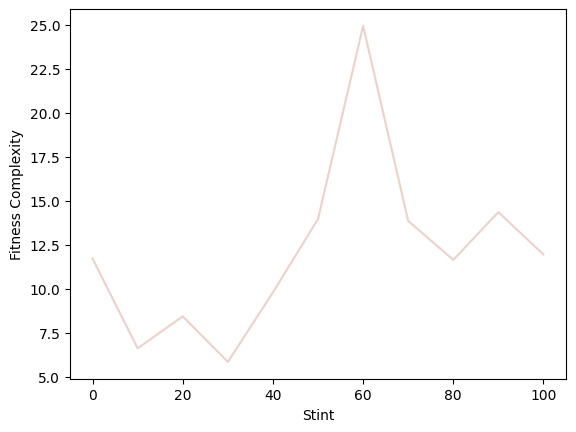

<AxesSubplot:xlabel='Stint', ylabel='Fitness Complexity'>

In [15]:
tp.tee(
    sns.lineplot,
    data=dfm10[ dfm10['Series'] == 16021 ],
    x='Stint',
    y='Fitness Complexity',
    hue='Series',
    legend=False,
    teeplot_outattrs={
        **{
            'bucket' : ib.dub( df['Bucket'] ),
            'endeavor' : ib.dub( df['Endeavor'].astype(int) ),
            'transform' : 'filter-Series-16021~filter-Stint-mod10',
            '_dfdigest' : dfdigest,
        },
        **make_outattr_metadata(),
    },
)


# case study: series 16018


<ipython-input-16-0c8e32462e8f>:15: DeprecatedWarning: make_outattr_metadata is deprecated. use nbmetalog package instead
  **make_outattr_metadata(),


teeplots/bucket=prq49+endeavor=16+hue=series+transform=filter-Series-16018~filter-Stint-mod10+viz=lineplot+x=stint+y=fitness-complexity+ext=.pdf
teeplots/bucket=prq49+endeavor=16+hue=series+transform=filter-Series-16018~filter-Stint-mod10+viz=lineplot+x=stint+y=fitness-complexity+ext=.png


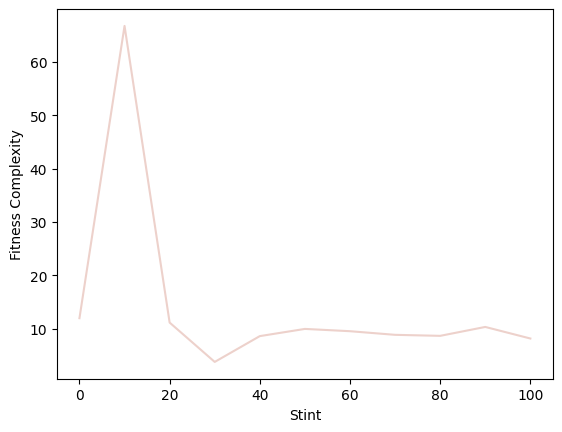

<AxesSubplot:xlabel='Stint', ylabel='Fitness Complexity'>

In [16]:
tp.tee(
    sns.lineplot,
    data=dfm10[ dfm10['Series'] == 16018 ],
    x='Stint',
    y='Fitness Complexity',
    hue='Series',
    legend=False,
    teeplot_outattrs={
        **{
            'bucket' : ib.dub( df['Bucket'] ),
            'endeavor' : ib.dub( df['Endeavor'].astype(int) ),
            'transform' : 'filter-Series-16018~filter-Stint-mod10',
            '_dfdigest' : dfdigest,
        },
        **make_outattr_metadata(),
    },
)
